In [2]:
import jieba

seg_list = jieba.cut("我来到北京清华大学",cut_all=True)
print("全模式："+"/".join(seg_list))
seg_list = jieba.cut("我来到北京清华大学",cut_all=False)
print("精确模式："+"/".join(seg_list))

全模式：我/来到/北京/清华/清华大学/华大/大学
精确模式：我/来到/北京/清华大学


In [ ]:
jieba.load_userdict("/Users/eamonyin/Downloads/迪哥nlp/练习/mydict.txt")
#也可以 jieba.add_word("乾清宫")
text ="故宫的著名景点包括乾清宫、太和殿和黄琉璃瓦等"

seg_list = jieba.cut(text,cut_all=True)
print("全模式："+"/".join(seg_list))
seg_list = jieba.cut(text,cut_all=False)
print("精确模式："+"/".join(seg_list))

In [15]:
import jieba.analyse

text ="故宫的著名景点包括乾清宫、太和殿和黄琉璃瓦等"
seg_list = jieba.cut(text,cut_all=False)
print(u"分词结果：")
print("/".join(seg_list))

#获取关键词
tags = jieba.analyse.extract_tags(text,topK=5,withWeight=True)
print(u"关键词：")
for word,weight in tags:
    print(word,weight)

分词结果：
故宫/的/著名景点/包括/乾清宫/、/太和殿/和/黄琉璃瓦/等
关键词：
著名景点 2.3167796086666668
乾清宫 1.9924612504833332
黄琉璃瓦 1.9924612504833332
太和殿 1.6938346722833335
故宫 1.5411195503033335


In [20]:
import jieba.posseg as pseg
words = pseg.cut("我爱北京天安门")
for word,flag in words:
    print("%s %s"%(word,flag))

<code object cut at 0x12d4f2920, file "/opt/miniconda3/envs/deepshare/lib/python3.9/site-packages/jieba/posseg/__init__.py", line 273>
我 r
爱 v
北京 ns
天安门 ns


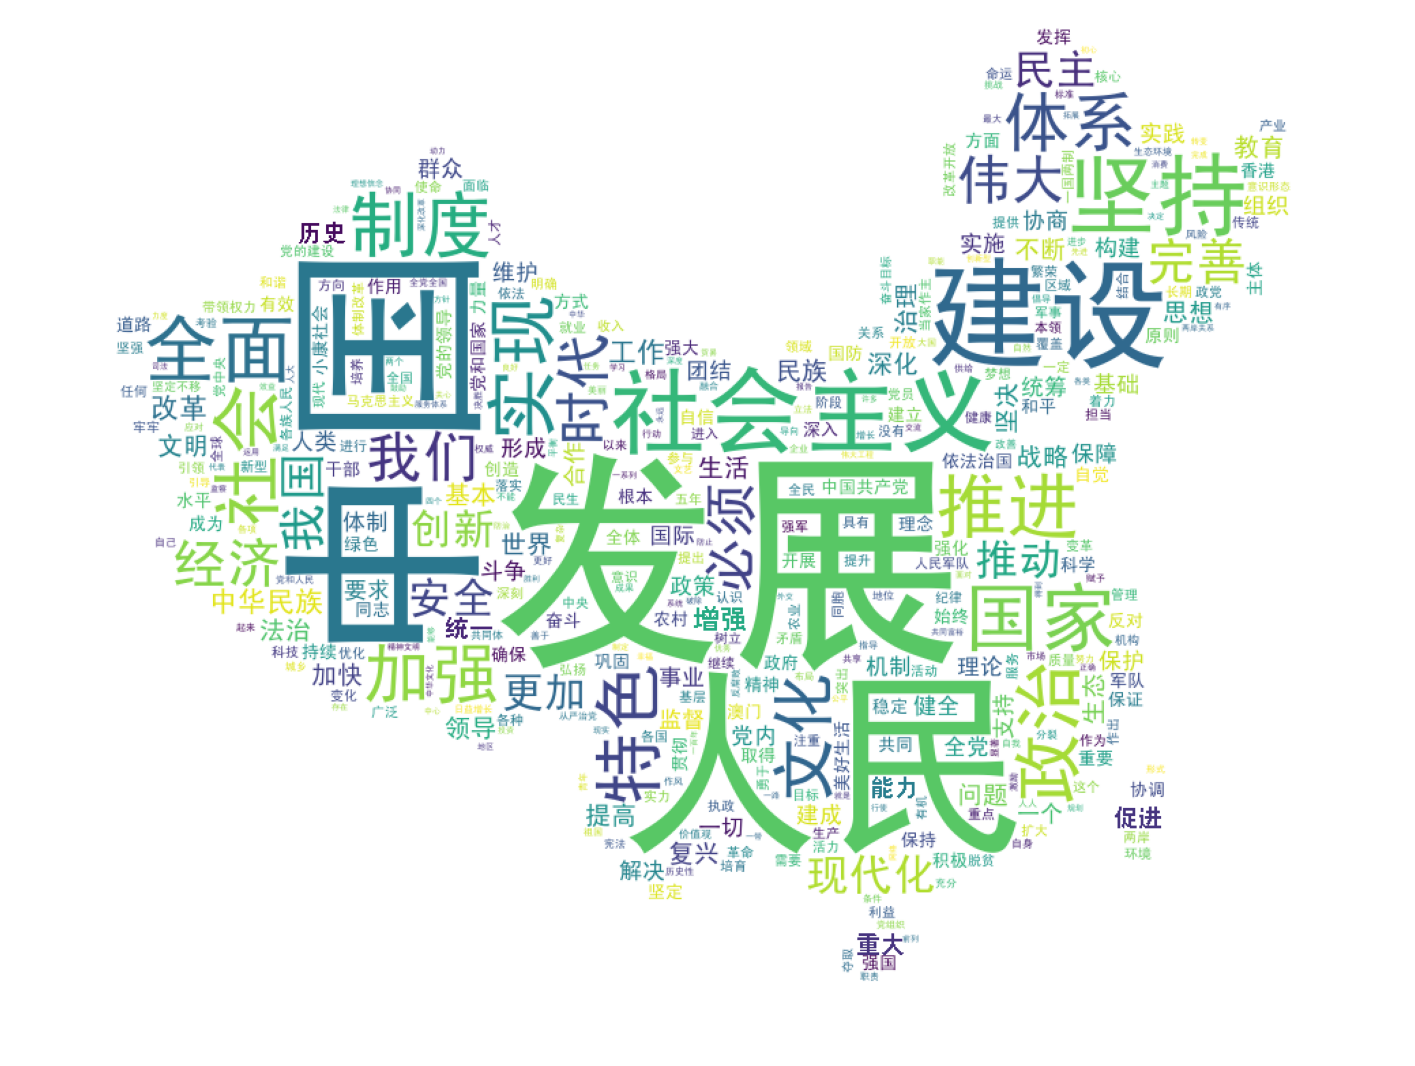

In [36]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import imageio

data={} #Python中字典格式
text_file = open("/Users/eamonyin/Downloads/迪哥nlp/练习/19Congress.txt",'r',encoding='utf-8')
text = text_file.read()
with open("/Users/eamonyin/Downloads/迪哥nlp/练习/cn_stopwords.txt",encoding='utf-8') as file:
    stopwords = {line.strip() for line in file}

seg_list = jieba.cut(text,cut_all=False)
for word in seg_list:
    if len(word) >= 2:
        if not data.__contains__(word): #如果data字典中不存在word，那么就初始化一个字典key，次数初始化为0
            data[word]=0
        data[word]+=1
#print(data)  

my_worldcloud = WordCloud(
    background_color="white",#设置背景颜色
    max_words=400,#设置最大实现的字数
    font_path=r"/Users/eamonyin/Downloads/迪哥nlp/练习/SimHei.ttf", #设置字体格式
    mask=imageio.v2.imread("/Users/eamonyin/Downloads/迪哥nlp/练习/Chinamap.jpg"), #图片
    width=1000,
    height=1000,
    stopwords= stopwords
).generate_from_frequencies(data)

plt.figure(figsize=(18,16))
plt.imshow(my_worldcloud)
plt.axis("off")
plt.show()
my_worldcloud.to_file("/Users/eamonyin/Downloads/result.jpg")
text_file.close()